In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/test/test"))

# Any results you write to the current directory are saved as output.

['9cdda32671cb192f096b20c91b46a150.jpg', 'da498fc860c8b76ca925c4218c5f0373.jpg', '433052030eeb117e4bd8f6ce033c9da4.jpg', '4c76899a6e4b4a6cfdd2f28707fa8114.jpg', '9efa3e92c1475b3ce4b7e2e598fa2785.jpg', '873191a1575a6292ed92714bfc659b87.jpg', '8f99b87b7a652d68232fbd6379529368.jpg', '316e46903ee485aeecfd229973abcc71.jpg', 'fc76ae520f30c6aba6dbfa8e82def89c.jpg', 'ee3ddba5f04e0674db0d18a9dd3b8131.jpg', '3d274fd9be439ea943b933ea1096b83c.jpg', 'dce6bd0871a4fae5896e0db9a33a25b3.jpg', '2c696471585dffd4c73e5ab728bc095c.jpg', '2b45a7f4b20456d05cf73f1a2929781d.jpg', 'f1546668528e13594143945b05436772.jpg', '348a5e2625f40aed338b824b8b760f91.jpg', 'dbdb97df617c0241526578971d0ff701.jpg', '7083e9cf1d5407b26fc83cd6f0603bf1.jpg', '2edb0bf826248b088d57e22799464c41.jpg', 'cfcfff07bfe0f6285dd12fc7f67b2ed7.jpg', 'b8c63c07c90eaa9b580b6b9f593160da.jpg', '043ed19696749350bdf9098f918ce5a0.jpg', '5762bb146887bf525cbfaa013f398adb.jpg', '683d4766b3ba4f22102993fe5800cc84.jpg', '47c710f17383f8db9c56636f4415a35b.jpg',

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
sample_csv = pd.read_csv('../input/sample_submission.csv')
train = pd.read_csv('../input/train.csv')
#test = pd.read_csv('../input/test/test/test.csv')
train.head(10)

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1
5,0017c3c18ddd57a2ea6f9848c79d83d2.jpg,1
6,002134abf28af54575c18741b89dd2a4.jpg,0
7,0024320f43bdd490562246435af4f90b.jpg,0
8,002930423b9840e67e5a54afd4768a1e.jpg,1
9,00351838ebf6dff6e53056e00a1e307c.jpg,1


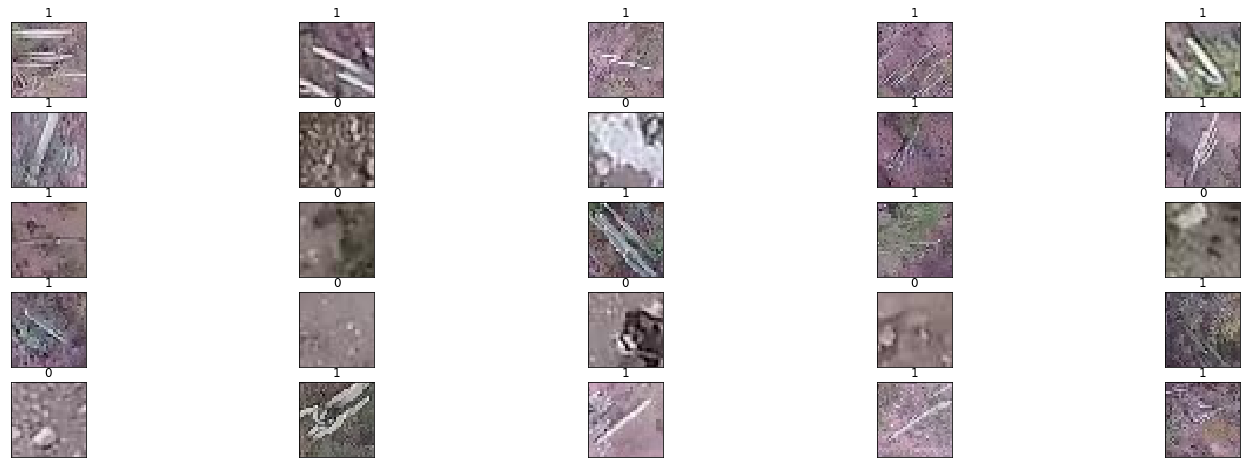

In [5]:
figure = plt.figure(figsize=(25, 8))
train_path = "../input/train/train/"
for idx in range(25):
    ax  = figure.add_subplot(5, 25//5, idx+1, xticks=[], yticks=[])
    im = Image.open(f"{train_path}{train.id.iloc[idx]}")
    plt.imshow(im)
    ax.set_title(train.has_cactus.iloc[idx])

Checking size of images:

In [6]:
train['image'] = pd.DataFrame([Image.open(train_path+x) for x in train.id])

In [7]:
sizes = train.image.map(lambda x : x.size)
sizes.value_counts()

(32, 32)    17500
Name: image, dtype: int64

In [8]:
in_shape = np.array(train.image[0]).shape
in_shape

(32, 32, 3)

In [9]:
train.head()

,id,has_cactus,image
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,000c8a36845c0208e833c79c1bffedd1.jpg,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,000d1e9a533f62e55c289303b072733d.jpg,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,0011485b40695e9138e92d0b3fb55128.jpg,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...


All are 32x32 missed that
3 channels

Time for model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import img_to_array
from skimage.io import imread

In [11]:
#add series of images as numpy array
np_imgs = [imread(train_path+x) for x in train.id]


In [51]:
#train['img_array'] = pd.Series([x.reshape(-1, 32, 32, 3) for x in np_imgs])
train['img_array'] = pd.Series([x for x in np_imgs])

In [34]:
for x in train.id[::100]:
    try:
        a = imread(train_path+x)
        #print(a.shape)
    except ValueError:
        print(x)

In [16]:
model = Sequential([
    Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=in_shape, data_format="channels_last"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(8, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1,activation='softmax')
])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)  

In [17]:
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [52]:
#d = np.array(train.image).reshape(-1,32,32,3)
#d.shape
as_list = np.array([x for x in train.img_array])
as_list.shape

(17500, 32, 32, 3)

In [54]:
model.fit(as_list, train.has_cactus,
         batch_size = 64,
         epochs=10,
         verbose=2)

Epoch 1/10
 - 9s - loss: 3.9756 - acc: 0.7506
Epoch 2/10
 - 8s - loss: 3.9756 - acc: 0.7506
Epoch 3/10
 - 9s - loss: 3.9756 - acc: 0.7506
Epoch 4/10
 - 9s - loss: 3.9756 - acc: 0.7506
Epoch 5/10
 - 9s - loss: 3.9756 - acc: 0.7506
Epoch 6/10
 - 8s - loss: 3.9756 - acc: 0.7506
Epoch 7/10
 - 9s - loss: 3.9756 - acc: 0.7506
Epoch 8/10
 - 9s - loss: 3.9756 - acc: 0.7506
Epoch 9/10
 - 9s - loss: 3.9756 - acc: 0.7506
Epoch 10/10


KeyboardInterrupt: 